In [1]:
import struct
import numpy as np
from sklearn import neighbors, metrics
import matplotlib.pyplot as plt

In [3]:
"""
This function reads the MNIST data from the IDX file format into numpy arrays

this relies on the fact that MNIST dataset consisntently uses unsigned types
with heir data segments.
sc : https://gist.github.com/tylerneylon/ce60e8a06e7506ac45788443f7269e40
"""

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [7]:
raw_train = read_idx('./jupyter/train-images.idx3-ubyte')
train_data = np.reshape(raw_train, (60000, 28*28))
train_label = read_idx('./jupyter/train-labels.idx1-ubyte')

raw_test = read_idx('./jupyter/t10k-images.idx3-ubyte')
test_data = np.reshape(raw_test, (10000, 28*28))
test_label = read_idx('./jupyter/t10k-labels.idx1-ubyte')

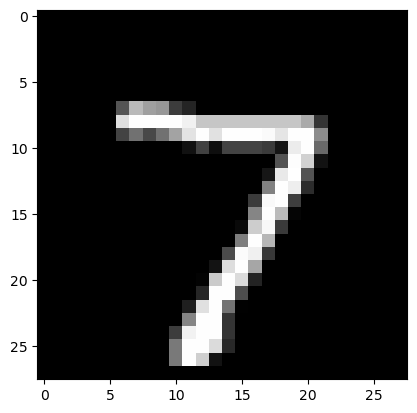

In [9]:
plt.imshow(raw_test[0], cmap='gray')
plt.show()

In [11]:
X_train = train_data
Y_train = train_label
#K = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)

In [13]:
X_test = test_data
Y_true = test_label
Y_pred = knn.predict(X_test)

In [14]:
con_matrix = metrics.confusion_matrix(Y_true, Y_pred)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

Confusion matrix, without normalization
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]]
Normalized confusion matrix
[[9.93877551e-01 1.02040816e-03 1.02040816e-03 0.00000000e+00
  0.00000000e+00 1.02040816e-03 2.04081633e-03 1.02040816e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.98237885e-01 1.76211454e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.68992248e-03 8.72093023e-03 9.65116279e-01 1.93798450e-03
  0.00000000e+00 0.000000

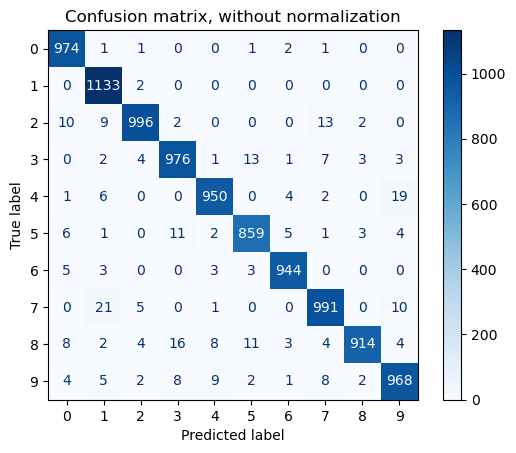

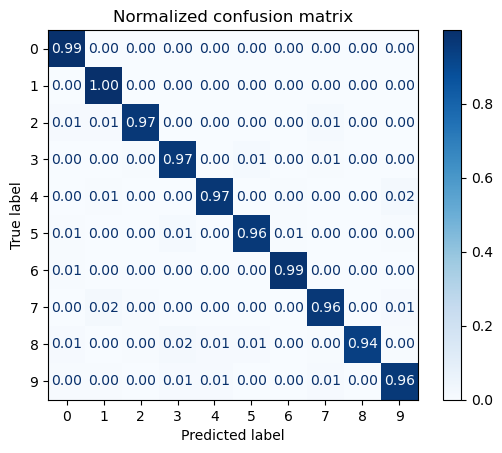

In [16]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    values_format = ".2f" if normalize == "true" else None
    disp = ConfusionMatrixDisplay.from_predictions(
        Y_true,
        Y_pred,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format=values_format
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [21]:
accuracy = metrics.accuracy_score(Y_true, Y_pred)
print(f'Accuracy: {accuracy}')
print(f'Accuracy %: {accuracy*100}%')

Accuracy: 0.9705
Accuracy %: 97.05%


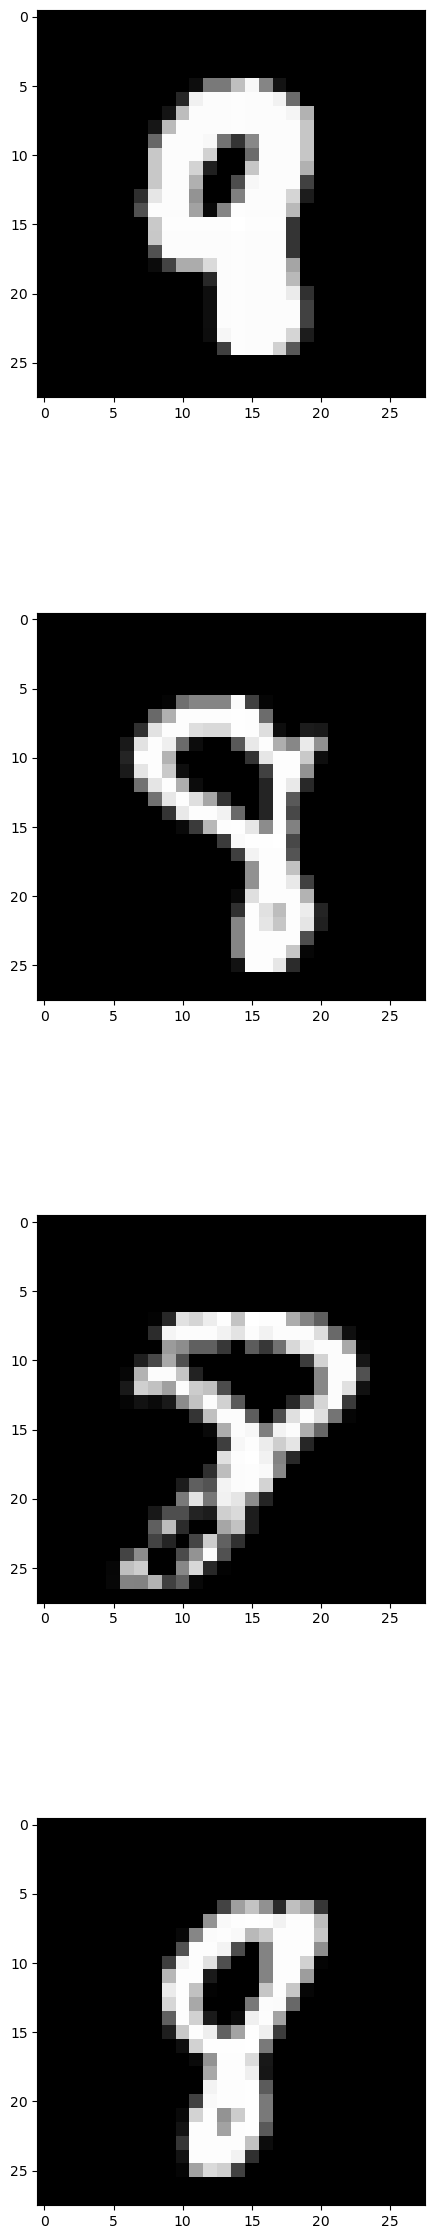

In [23]:
idx = np.where((Y_pred == 9) & (Y_true == 8))[0]
fig = plt.figure(figsize=(5, 30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx), 1, i+1)
    imgplot = ax.imshow(X_test[idx[i]].reshape(28, 28), cmap='gray')
    imgplot.set_interpolation('nearest')
    
plt.show()

In [39]:
#pick 2, 3, and 8

idx = (train_label == 2) | (train_label == 3) | (train_label == 8)

X_train = train_data[idx]
Y_train = train_label[idx]

knn = neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)

In [41]:
# test data for the classifier
idx = (test_label == 2) | (test_label == 3) | (test_label == 8)
X_test = test_data[idx]
Y_true = test_label[idx]
Y_pred = knn.predict(X_test)

In [43]:
con_matrix = metrics.confusion_matrix(Y_true, Y_pred)

Confusion matrix, without normalization
[[1025    3    4]
 [   5 1001    4]
 [   6   16  952]]
Normalized confusion matrix
[[0.99321705 0.00290698 0.00387597]
 [0.0049505  0.99108911 0.0039604 ]
 [0.00616016 0.0164271  0.97741273]]


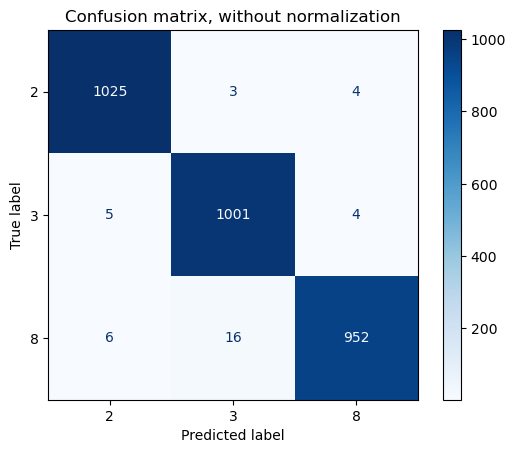

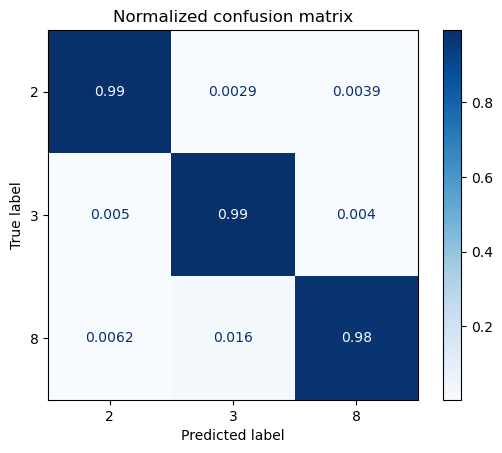

In [45]:

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        Y_true,
        Y_pred,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

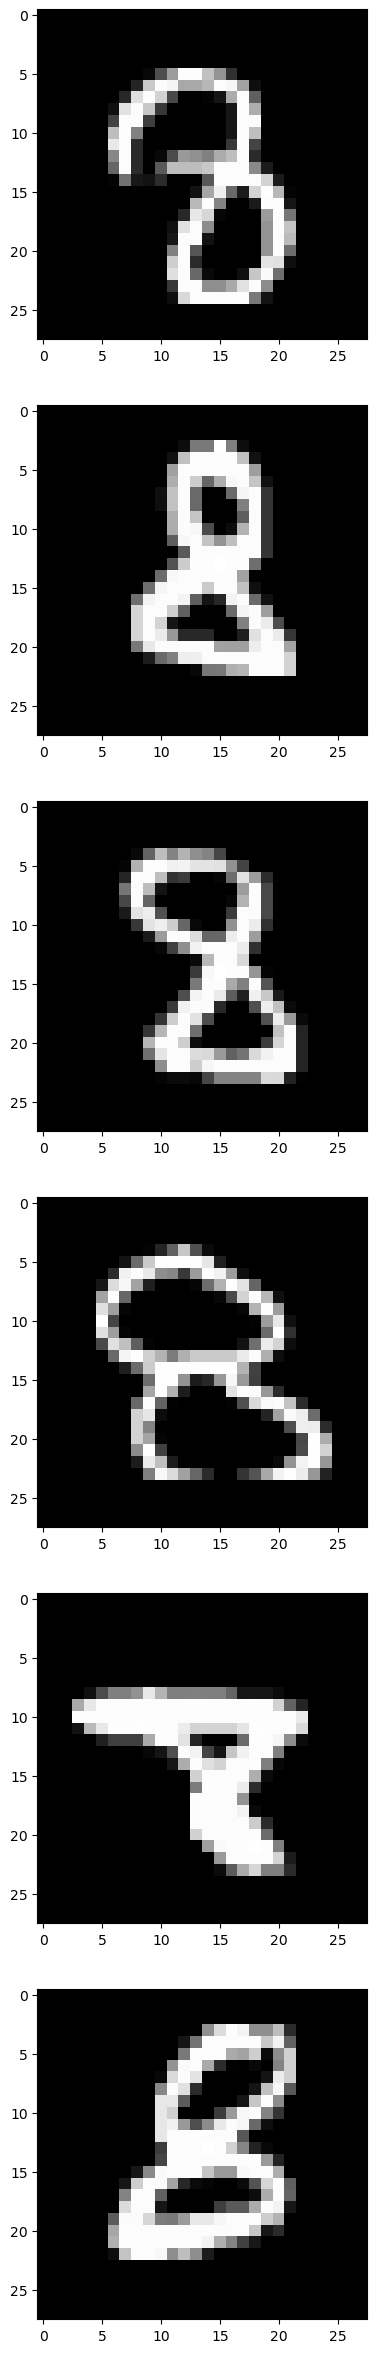

In [47]:
idx = np.where((Y_pred == 2) & (Y_true == 8))[0]
fig = plt.figure(figsize=(5, 30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx), 1, i+1)
    imgplot = ax.imshow(X_test[idx[i]].reshape(28, 28), cmap='gray')
    imgplot.set_interpolation('nearest')
    
plt.show()